# Importar las bibliotecas necesarias
Importar las bibliotecas necesarias, incluyendo TensorFlow, Keras, NumPy, etc.

In [23]:
# Import necessary libraries

# TensorFlow and Keras for creating and training the neural network
import tensorflow as tf
from tensorflow import keras

# NumPy for array manipulation and mathematical operations
import numpy as np

# Matplotlib for data visualization
import matplotlib.pyplot as plt

# Sklearn for splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# Pandas for data manipulation and analysis
import pandas as pd

# Os for interacting with the operating system
import os

# Cv2 for image processing
import cv2

# Importing the model
from tensorflow.keras.models import load_model

# Load the model
model = load_model('face_emotion_classifier.h5')


# Cargar y preprocesar el conjunto de datos 
Cargar el conjunto de datos y realizar el preprocesamiento necesario, como la normalización, la codificación one-hot de las etiquetas, etc.

In [2]:
# Define the path to the dataset
data_dir = 'data'

# Define the categories
categories = ['happy', 'sad', 'angry']

# Define the size to which images will be resized
img_size = 50

# Initialize an empty list to store the data
data = []

# Function to create the training data
def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                data.append([new_array, class_num])
            except Exception as e:
                pass

# Call the function to create the training data
create_training_data()

# Shuffle the data
np.random.shuffle(data)

# Separate the features (X) and the labels (y)
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

# Convert the features and labels to NumPy arrays
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

# Normalize the features
X = X / 255.0

# One-hot encode the labels
y = keras.utils.to_categorical(y, num_classes=len(categories))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.

In [3]:
# The code for this section has already been written in the provided code. Here it is extracted:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir la arquitectura de la CNN
Construir la arquitectura de la CNN utilizando la API de Keras. Esto incluirá la adición de capas convolucionales, capas de pooling, capas de dropout y capas densas.

In [4]:
# Import the necessary layers for our CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the convolutional layers
model.add(Flatten())

# Add a dense layer
model.add(Dense(64))
model.add(Activation('relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(len(categories)))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Compilar y entrenar la CNN
Compilar la CNN especificando la función de pérdida, el optimizador y las métricas. Luego, entrenar la CNN en el conjunto de entrenamiento.

In [5]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Save the model
model.save('face_emotion_classifier.h5')

Epoch 1/10


7/7 [==============================] - 2s 63ms/step - loss: 1.0991 - accuracy: 0.3602 - val_loss: 1.1017 - val_accuracy: 0.2264
Epoch 2/10
7/7 [==============================] - 0s 28ms/step - loss: 1.1071 - accuracy: 0.3412 - val_loss: 1.1104 - val_accuracy: 0.2264
Epoch 3/10
7/7 [==============================] - 0s 26ms/step - loss: 1.0988 - accuracy: 0.3223 - val_loss: 1.0935 - val_accuracy: 0.5283
Epoch 4/10
7/7 [==============================] - 0s 27ms/step - loss: 1.0930 - accuracy: 0.3697 - val_loss: 1.0911 - val_accuracy: 0.3962
Epoch 5/10
7/7 [==============================] - 0s 28ms/step - loss: 1.0890 - accuracy: 0.3791 - val_loss: 1.0813 - val_accuracy: 0.4528
Epoch 6/10
7/7 [==============================] - 0s 27ms/step - loss: 1.0719 - accuracy: 0.3934 - val_loss: 1.0630 - val_accuracy: 0.4717
Epoch 7/10
7/7 [==============================] - 0s 26ms/step - loss: 1.0581 - accuracy: 0.3934 - val_loss: 1.0725 - val_accuracy: 0.4151
Epoch 8/10
7/7 [=========

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluar el rendimiento de la CNN
Evaluar el rendimiento de la CNN en el conjunto de prueba.

2/2 - 0s - loss: 0.9751 - accuracy: 0.4717 - 34ms/epoch - 17ms/step

Test accuracy: 0.4716981053352356


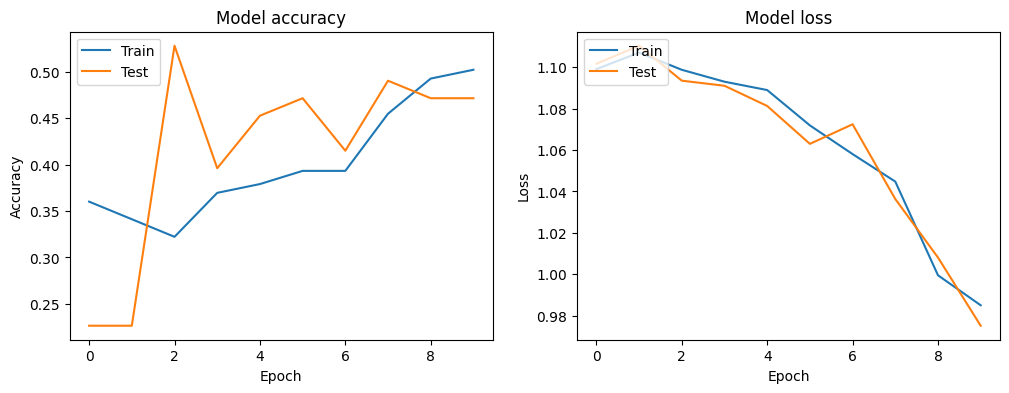

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Visualizar los resultados
Visualizar los resultados del entrenamiento y la evaluación utilizando gráficos de pérdida y precisión.

In [36]:
# Keras visualizer for visualizing the model
from keras_visualizer import visualizer

# Visualize the model
visualizer(model, file_name='graph', file_format= None, view=True, settings=None)


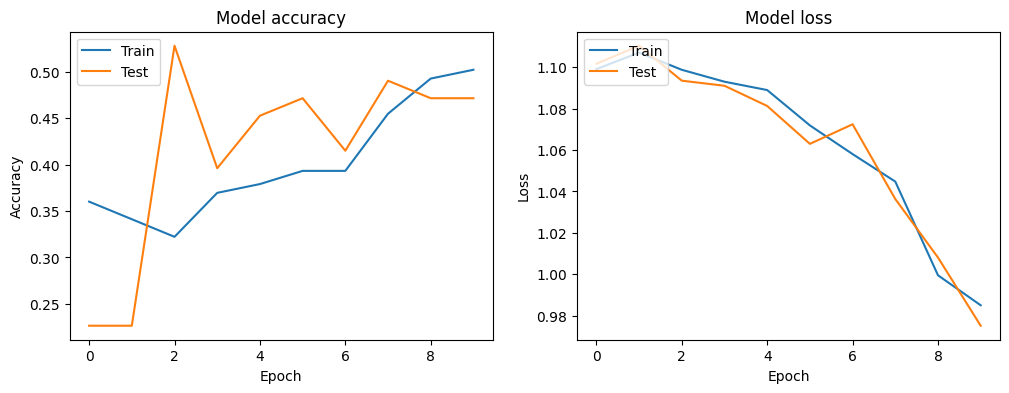

In [7]:
# The code for this section is already included in the provided code. Here it is extracted:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Explicacion de los temas 
## Redes convulocionales
Las redes neuronales convolucionales (CNN) son arquitecturas especializadas en el procesamiento de datos en rejilla, como imágenes. Utilizan operaciones de convolución para deslizar filtros sobre la entrada, capturando patrones locales como bordes y texturas. Con capas convolucionales y de pooling, la red aprende jerarquías de características, reduciendo la dimensionalidad espacial. Las funciones de activación introducen no linealidades, y las capas completamente conectadas realizan la clasificación final. Durante el entrenamiento, se minimiza una función de pérdida ajustando los pesos con retropropagación. Las CNN son eficaces en tareas de visión por computadora, destacando por su capacidad para aprender representaciones jerárquicas de características en datos de rejilla.
## Tensores
Los tensores son una generalización de vectores y matrices a un mayor número de dimensiones y son una de las principales estructuras de datos en TensorFlow. 

En términos de programación, los tensores son como arrays multidimensionales. Un tensor de rango 0 es un escalar, un tensor de rango 1 es un vector, un tensor de rango 2 es una matriz, y los tensores de rango 3 o superior son simplemente referidos como tensores n-dimensionales.

Algunos ejemplos de tensores:

- Tensor de rango 0: `5`
- Tensor de rango 1: `[1, 2, 3]`
- Tensor de rango 2: `[[1, 2, 3], [4, 5, 6]]`
- Tensor de rango 3: `[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]`

En el contexto de las redes neuronales, los tensores fluyen a través del modelo (de ahí el nombre TensorFlow), pasando por las capas de la red y siendo transformados en el camino.

Por ejemplo, una imagen en escala de grises de 28x28 píxeles puede ser representada como un tensor de rango 2. Si tienes un lote de 100 de estas imágenes, podrías almacenarlas en un tensor de rango 3. Y si las imágenes son a color (con 3 canales de color), podrías almacenarlas en un tensor de rango 4.

# Cargar el modelo

In [ ]:
# Streamlit for deploying the model
import streamlit as st

# joblib for saving the model
import joblib

model = joblib.load('face_emotion_classifier.h5')